In [1]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz')
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state = 777)

In [3]:
num_x_train = X_train.shape[0]
num_x_val = X_val.shape[0]
num_x_test = x_test.shape[0]
num_x_train

42000

In [4]:
x_train = (X_train.reshape((num_x_train, 28*28))) / 255 # 정규화
x_val = (X_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28))) / 255

In [5]:
# y_test 0 ~ 9 숫자가 각각 몇개인지 조회
type(y_test)
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [6]:
import pandas as pd
df  = pd.Series(y_test)
df.value_counts().sort_index() # 각 개수

0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_val = to_categorical(Y_val)
y_test = to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(optimizer='adam', # 옵티마이저 : adam
             loss = 'categorical_crossentropy', # 손실함수
             metrics = ['acc'])
history = model.fit(x_train, y_train,
                   epochs = 30, # 역전파를 이용해서 최적을 찾아냄
                   batch_size = 128, # 학습데이터 개수
                   validation_data = (x_val, y_val)) # 검증데이터

NameError: name 'model' is not defined

In [ ]:
# 학습 결과 확인
# loss, acc, val_loss, val_acc를 그래프로 출력
# 훈련 및 검증데이터의 손실값을 그래프로 출력
import matplotlib.pyplot as plt
his_dict = history.history # dict : loss학습손실값 acc학습정확도  // val_ 검증

loss = his_dict['loss'] # 학습데이터의 손실함수값
val_loss = his_dict['val_loss'] # 검증데이터의 손실함수값

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc'] # 정확도
val_acc = his_dict['val_acc'] # 검증데이터의 정확도

# 훈련 및 검증 손실 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()
plt.show()

In [4]:
# fashionmnist
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)

(60000, 28, 28)


In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


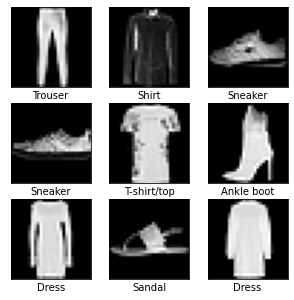

In [7]:
# 임의의 데이터를 이미지로 출력
import matplotlib.pyplot as plt
import numpy as np
sample_size = 9
# 난수 생성 0 ~ 59999 중 9개
random_idx = np.random.randint(60000, size = sample_size)
plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx) :
    plt.subplot(3,3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap = 'gray')
    plt.xlabel(class_names[y_train[idx]])
plt.show()

In [8]:
# 학습데이터 테스트 데이터 정규화 0~1
x_train[:10]
x_train = x_train / 255
x_test = x_test / 255


In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state = 777)
print('훈련데이터 :',X_train.shape,', 레이블 :',Y_train.shape)
print('검증데이터 :',X_val.shape,', 레이블 :',Y_val.shape)

훈련데이터 : (42000, 28, 28) , 레이블 : (42000, 10)
검증데이터 : (18000, 28, 28) , 레이블 : (18000, 10)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28))) # 2차원을 1차원으로 변경, 입력층 vs .reshape으로 1차원으로 바꿀필요없음
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))


In [19]:
model1.summary()              # 입력층
                                # 첫번째 은닉층 64
                                # 출력층 32
                                # 출력층 10

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
histroy1 = model1.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, Y_val))

In [ ]:
model1.evaluate(x_test,y_test)

In [ ]:
results = model1.predict(x_test)

In [ ]:
# 혼돈행렬 조회하기
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# np.argmax(y_test, axis = -1) y_test의 최대값 인덱스 리턴, 인덱스 숫자
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()


In [ ]:
df.value_counts().sort_index()

In [ ]:
print(classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

In [ ]:
# model2 구성하기 ,입력층 출력 128, 은닉층 64, 은닉층 32

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28))) # 2차원을 1차원으로 변경, 입력층 vs .reshape으로 1차원으로 바꿀필요없음
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
histroy2 = model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, Y_val))

Epoch 1/30


InternalError:  Blas GEMM launch failed : a.shape=(128, 784), b.shape=(784, 128), m=128, n=128, k=784
	 [[node sequential_1/dense_4/MatMul (defined at <ipython-input-12-10e8984d6e18>:2) ]] [Op:__inference_train_function_860]

Function call stack:
train_function


In [ ]:
model1.evaluate(x_test,y_test)

In [ ]:
results = model1.predict(x_test)

In [ ]:
# 혼돈행렬 조회하기
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# np.argmax(y_test, axis = -1) y_test의 최대값 인덱스 리턴, 인덱스 숫자
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()


In [ ]:
print(classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

In [14]:
# 두개모델 그래프로 비교
import numpy as np
import matplotlib.pyplot as plt
def draw_loss_acc(history_1, history_2, epochs) :
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys()) # ['loss', 'acc', 'val_loss', 'val_acc']
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) # 여러개를 하나의 그래프로
    ax.spines['top'].set_color('none') # c로 바꾸면 외곽선이 그려짐
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    for i in range(len(his_dict_1)) :
        temp_ax = fig.add_subplot(2,2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i+2)%2 +2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label ='train_'+temp) # 손실함수 그래프
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i==1 or i==3) : # 정확도인 경우
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
draw_loss_acc(history1, history2, 30)

NameError: name 'history1' is not defined

In [15]:
history1.history.keys()
history2.history.keys()

NameError: name 'history1' is not defined